


# <center> TP6 -  Clustering spectral  </center>
<center> 2023/2024 - T. Godin, L. Naert </center>

<center> IUT de Vannes, BUT Informatique </center>



***
Le but de ce TP est de voir une nouvelle application du calcul de valeur propre : le clustering.




In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
#to get interactive graph. plt.close() required
import warnings
warnings.filterwarnings("once")

from sklearn.cluster import KMeans

> __Question 1 (mise en place)__ : 
À l'aide de  la  [documentation](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html) `networkX`, créer un graphe (NetworkX) à partir de la matrice d'adjacence donnée (en numpy). Effectuer l'opération inverse. Afficher le avec `nx.draw`. 


In [7]:
A=np.array(
[[0,1,0,0,1], 
[1,0,1,1,0], 
[0,1,0,0,0], 
[0,1,0,0,1],
[1,0,0,1,0]])

#todo
    

## Analyse spectrale d'un graphe et première valeur propre

On appelle analyse spectrale d'un graphe, l'étude des __valeurs et vecteurs propres de la matrice Laplacienne__ de ce graphe. Dans la suite de ce TP, nous ferons du clustering spectral. Il s'agit du partitionnement ("clustering") d'un graphe en utilisant son analyse spectrale.

La matrice Laplacienne d'un graphe est obtenue par le calcul suivant : $L = D - A$ avec $L$ la matrice Laplacienne, $D$ la matrice des degrés et $A$ la matrice d'adjacence du graphe. 

Pour rappel :  la matrice $D$ est une matrice diagonale dont les coefficients diagonaux sont ceux de $A^2$ 


> __Question 2 (Laplacienne)__ : Faire une fonction `adjTolaplacian(A)` qui retourne la matrice Laplacienne d'un graphe à partir de sa matrice d'adjacence.


In [8]:

def adjTolaplacian(A):
    """
         Returns the laplacian matrix from an adjacency matrix.

        :param A: the adjacency matrix
        :type A: a matrix (two dimensionnal np array) containing only integers
        :return: the  laplacian matrix
        :rtype: a matrix (two dimensionnal np array) containing only integers
    """     

        
    return "Todo"


La plus petite valeur propre de la matrice Laplaciennne a pour valeur 0 et donne une indication sur l'aspect connexe ou non du graphe. En effet, la multiplicité de cette valeur propre donne le nombre de sous-graphes connexes du graphe. Pour rappel, la multiplicité d'une valeur propre est donnée par le nombre de vecteurs propres associés à cette valeur. 

> __Question 3 (première valeur propre)__ :
> 1. Donner les valeurs et vecteurs propre de la matrice Laplaciennne associée au graphe de la question 1 à l'aide de `np.linalg`. Quelle est la multiplicité de la valeur propre 0 ? Ce graphe est-il connexe ?
> 2. La fonction `nx.fast_gnp_random_graph(nbSommet,p)` permet de créer un graphe de `nbSommet` sommets avec une probabilité de créer une arête de `p`. Utiliser cette fonction pour créer un (petit) graphe non connexe et calculer les valeurs et vecteurs propres de la Laplacienne. Quelle est la multiplicité de la valeur propre 0 dans ce cas ?

_Attention au format des sorties de `np.linalg.eig(L)` et à l'ordre des valeurs/vecteurs propres_ 

In [9]:
# Partie 1


#Partie 2


# Génération de graphes de tests : graphes de réseaux sociaux

Définissons un générateur de graphes, appelé _stochastic block model_, qui permet de créer des graphes ressemblant à des réseaux sociaux (virtuels ou rééls). Ce type de graphes contient des "communautés" ou "clusters" évidents et permettra donc de tester nos méthodes de clustering.

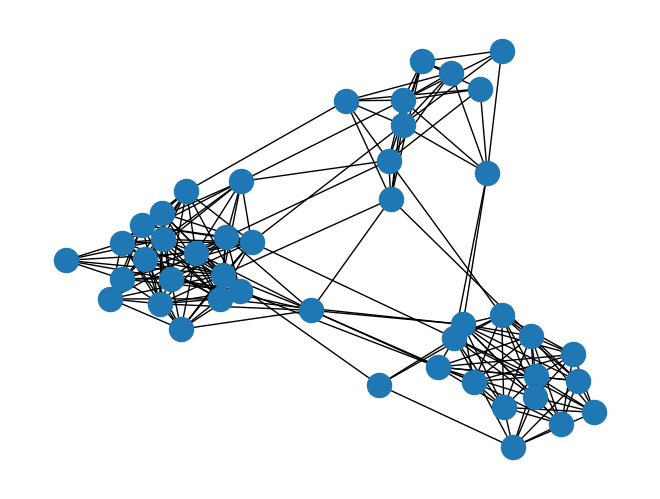

In [10]:
#SBM homebrew

def SBM_home(array,pin,pout):
    """
         Retourne la matrice d'adjacence d'un graphe généré par stochastic block model

        :param array: le nombre de sommets par communauté
        :type array: une liste d'entiers
        :param pin: probabilité de construire une arete entre deux membres de la même communauté
        :type pin : float entre 0 et 1
        :param pout: probabilité de construire une arete entre deux membres de communautés différentes
        :type pout : float entre 0 et 1
        :return: la matrice d'adjacence générée
        :rtype: une matrice (2D np. array) contenant des entiers
    """
    
    n=np.sum(array)
    ncum=np.cumsum(array)
    A=np.zeros((n,n),int)
    
    ki=0 #current connected component
    for i in range(n):
        if i>=ncum[ki]:
            ki=ki+1
            #print("i,ki",i,ki)
        kj=ki #current connected component
        for j in range(i+1,n):
            if j>=ncum[kj]:
                kj=kj+1

               
            if ki==kj:
                A[i][j]=np.random.binomial(1,pin)
                A[j][i]=A[i][j]
            else:
                A[i][j]=np.random.binomial(1,pout)
                A[j][i]=A[i][j]          
    return A

ASBM=SBM_home([10,15,20], 0.6, 0.02)
np.array(ASBM)

GSBM=nx.from_numpy_array(ASBM)

#print(ASBM)
nx.draw(GSBM,pos=nx.spring_layout(GSBM))

Voici la version networkx du même principe.

In [11]:
# Stochastic block model
#np.random.seed(13)

G = nx.random_partition_graph([10,15,20], 0.5, 0.02)

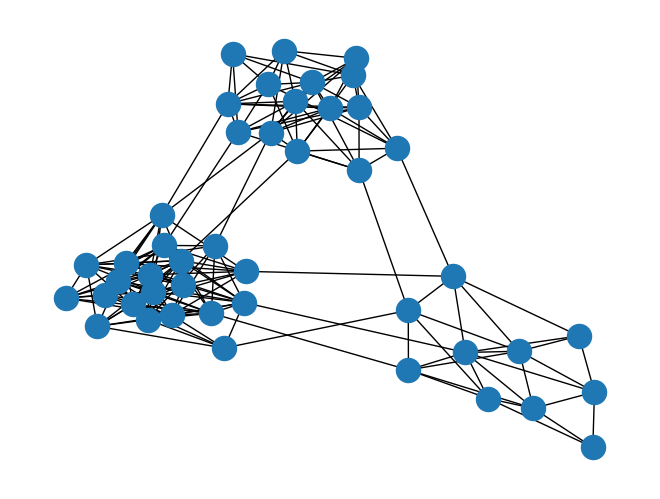

In [12]:
nx.draw(G)
plt.show()

Dans ces graphes, dont on connait la méthode de construction, on peut se servir de la structure pour souligner les communautés. Dans `sbm_graph`, nous avons rajouté un champs `cluster` pour chaque sommet. Ce champs est initialisé avec une valeur différente en fonction de la communauté à laquelle appartient le sommet. 

La fonction `show_with_clusters` permet d'afficher ces communautés dans des couleurs différentes. 

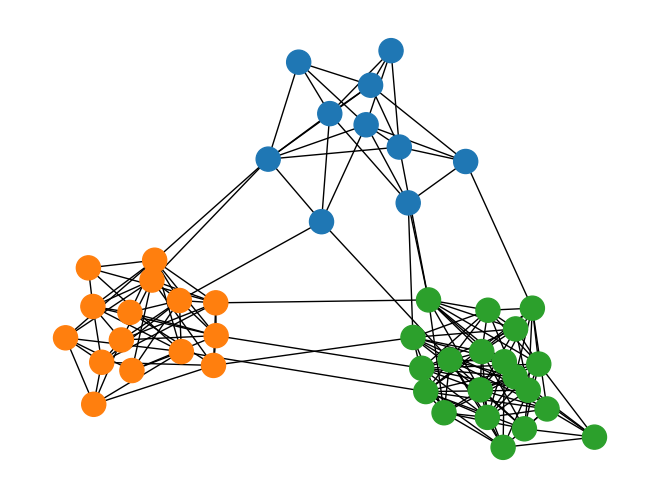

In [13]:
def sbm_graph(clusters, p_in, p_out):
    np.random.seed(13)

    G = nx.random_partition_graph(clusters, p_in, p_out)
    u = 0
    for k,s in enumerate(np.cumsum(clusters)):
        while u < s:
            G.nodes[u]['cluster'] = k
            u += 1
    return G
G = sbm_graph([10,15,20], 0.5, 0.02)


def show_with_clusters(G):
    """
        Plots a graph with clusters coloured

        :param G: a graph with cluster field 
        :type G: a networkx graph        
    """        
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    nb_colors = len(colors)
    clusters = nx.get_node_attributes(G, 'cluster')
    node_colors = [colors[clusters[u] % nb_colors] for u in G]
    nx.draw(G, node_color = node_colors)
    plt.show()
    
show_with_clusters(G)
plt.show()

Cependant, quand on étudie des données réelles, nous n'avons pas le nombre de sommets par communauté. On ne peut donc pas utiliser cette information directement. On va donc chercher à retrouver ces communautés ("clusters"), en utilisant les valeurs propres des matrices associées au graphe. 

## Clustering grâce à la deuxième valeur propre

On va chercher à grouper des sommets d'une même communauté ensemble. Pour cela, la fonction `initializeCluster(G)` permet de créer un champs `cluster` pour chaque sommet.



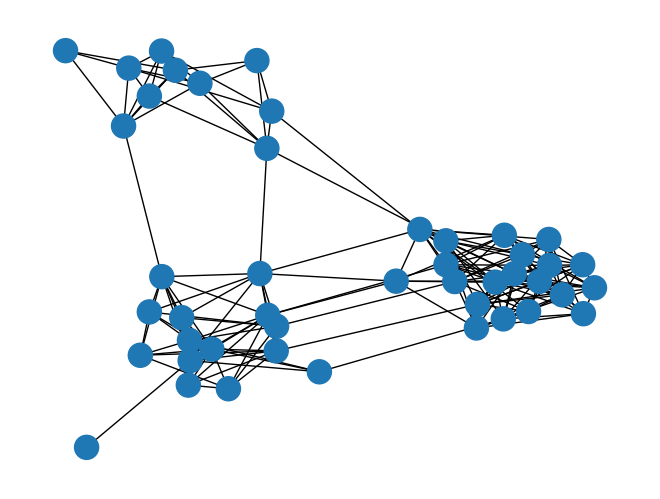

In [14]:
G = sbm_graph([10,15,20], 0.5, 0.02)


def initializeCluster(G):
    """
         Adds a field 'cluster' to the graph

        :param G: a graph 
        :type G: a networkx graph
        :return: a graph 
        :rtype: a networkx graph        
    """        
    
    for node in G.nodes:
        G.nodes[node]['cluster'] = 0
    return G
    
initializeCluster(G)
show_with_clusters(G) # Aucun cluster pour le moment...

Nous avons vu l'interet du plus petit vecteur propre de la Laplacienne : il permettait de savoir si un graphe était connexe ou non et même de savoir de combien de sous-graphes connexes ce graphe était composé. Dans des graphes non connexes, un clustering est évident : chaque sous graphe connexe peut former une communauté. Mais les graphes de réseaux sociaux comme créés précédemment sont connexes, la première valeur propre, 0, a donc une multiplicité de 1 dans ce cas et ne donne pas d'informations supplémentaires. 

On va donc utiliser __la deuxième plus petite valeur propre de la matrice laplacienne__ afin de procéder au clustering dans le cas de graphes connexes comme ceux générés dans la partie précédente. Le vecteur propre associé à cette valeur propre va permettre de créer 2 clusters. Ce vecteur propre est appelé "vecteur de Fiedler".

Plus précisément, si $v$ est le vecteur propre associé à la deuxième plus petite valeur propre de la matrice laplacienne de $G$, alors on va mettre dans le premier cluster tous les sommets $i$ ayant une coordonnée négative dans $v$ ($v[i] < 0$), tandis que les autres iront dans le second cluster.

> __Question 4 (clustering spectral avec 2 clusters)__ :
> Créer une fonction `spectralCluster(G,ordr = 0)` qui remplit le champs `cluster` d'un graphe `G` selon la règle donnée. `ordr` représente la valeur propre considérée : 0 pour la deuxième plus petite, 1 pour la troisième plus petite...



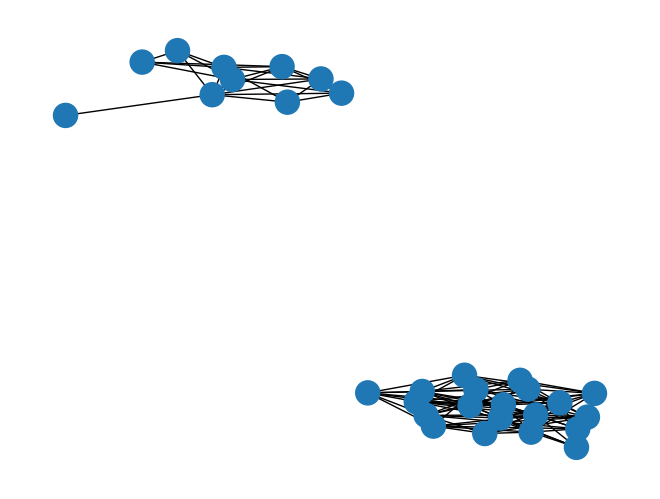

In [15]:
def spectralCluster(G,ordr = 0):
    """
        Fills the field 'cluster' according to the Fiedler eigen-weights

        :param G: un graphe 
        :type G: un graphe networkx
        :param ordr : la valeur propre à utiliser (0 pour utiliser la deuxième plus petite valeur propre, 1, pour utiliser la 3ème plus petite...)
        :type ordr : un entier
        :return: un graphe avec le champs cluster rempli
        :rtype un graphe networkx      
    """        
   

    return "todo"


G = sbm_graph([10,15,20], 0.5, 0.02)

A=np.array( [[0 , 1 , 0 , 0 , 1 , 0 ],
 [ 1 , 0 , 1 , 0 , 1 , 0 ],
 [ 0 , 1 , 0 , 1 , 0 , 0 ],
 [ 0 , 0 , 1 , 0 , 1 , 1 ],
 [ 1 , 1 , 0 , 1 , 0 , 0 ],
 [ 0 , 0 , 0 , 1 , 0 , 0]])


G = sbm_graph([10,20], 0.5, 0.02)
#G = nx.from_numpy_array(A)

initializeCluster(G)

spectralCluster(G)
show_with_clusters(G)  


> __Question 5 (bonus - 4 clusters)__ :
> Ecrire une fonction `spectralCluster_4clusters(G)` qui utilise le même principe mais qui produit 4 clusters (et non pas 2 comme la fonction précédente) à partir de la 2ème et 3ème valeurs propres.


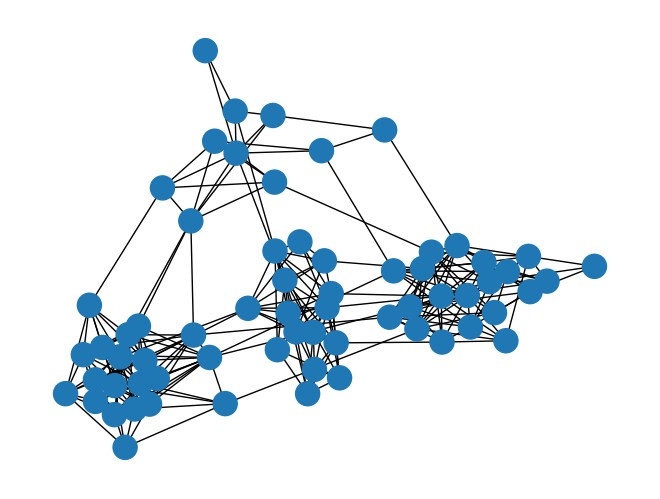

In [16]:
#Bonus Olivier BRUDU

# Cette question reprend l'approche de la question précédente, nous allons réutiliser des parties du code

def spectralCluster_4clusters(G):
    
   
    return "todo"



A=np.array( [[0 , 1 , 0 , 0 , 1 , 0 ],
 [ 1 , 0 , 1 , 0 , 1 , 0 ],
 [ 0 , 1 , 0 , 1 , 0 , 0 ],
 [ 0 , 0 , 1 , 0 , 1 , 1 ],
 [ 1 , 1 , 0 , 1 , 0 , 0 ],
 [ 0 , 0 , 0 , 1 , 0 , 0]])


G = sbm_graph([10,15,20,20], 0.5, 0.01)
#G = nx.from_numpy_array(A)

initializeCluster(G)
spectralCluster_4clusters(G) 
show_with_clusters(G)  


[K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) est une méthode de clustering utilisant non pas les valeurs propres mais la notion de distance entre des points pour définir des clusters. Au lieu d'utiliser le fait qu'un sommet ait une coordonnée positive/négative sur un vecteur propre, il est possible d'utiliser à la fois l'analyse spectrale et les k-means pour faire le clustering. 

Voici l'algorithme utilisé dans ce cas : 

Entrées :  Graphe de $n$ sommets et nombre $k$ de clusters voulu

* Calcul de la Laplacienne $L$.
* Calcul des $k+1$ premiers eigenvectors $(u_0, u_1,...,u_k)$ de $L$. $u_0$, associé à la valeur propre 0 est écarté.
* Pour $i=1,...,n$ , soit $ y_i \in \mathbb{R}^k$ le vecteur formés des i-ème coordonnées de chaque $u_j$ ($j$ allant de $1$ à $k$).
* Appliquer l'algorithme k-means sur ces $(y_i)_{i=1,...,n}$ pour les partitionner (fonction `KMeans(k).fit(X)` avec `X` les données à partitionner)
* Affecter au champs `cluster` de chaque sommet l'étiquette correspondante

Sortie:  le graphe G avec les informations de cluster

> __Question 6 (spectral + k-means)__ : Implémenter cet algorithme dans la fonction `spectralClusteringKMeans(G, k)`


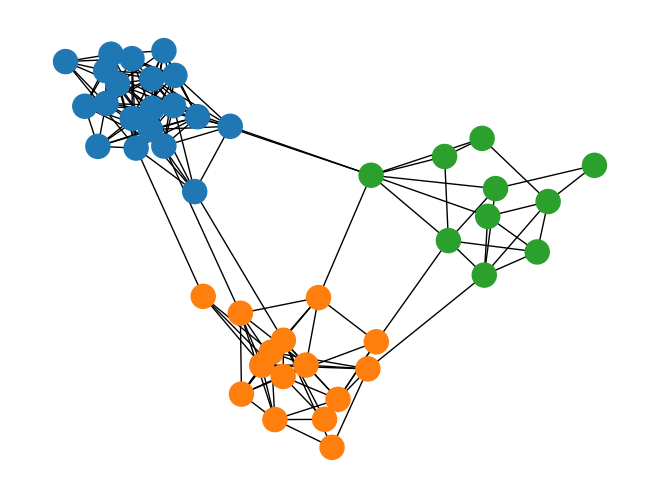

In [12]:
#Bastien COUTAND
def spectralClusteringKMeans(G, k):
    """
        Builds a graph with k clusters.

        :param G: graph
        :type g: networX graph
        :param k: the number of clusters desired
        :type k: integer
        :return: Cluster A1, ..., 1k with Ai = {j|yj in Ci}
        :rtype: networkX graph
    """
    

    return "todo"

G = sbm_graph([10,15,20], 0.5, 0.01)
initializeCluster(G)
G = spectralClusteringKMeans(G,3)
show_with_clusters(G)


## Holly Cow: application à la detection de formes

Allons un peu plus loin et appliquons notre clustering spectral à la détection de forme dans le cas de réseaux en trois dimensions ("mesh")...

In [13]:
import trimesh

#le fichier mesh provient de https://projet.liris.cnrs.fr/meshben/

C:\Users\kiba_\AppData\Roaming\Python\Python312\site-packages\trimesh\util.py:69: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  return pkgutil.find_loader(name) is not None


> __Todo__ : Importer le fichier [cow.obj](https://projet.liris.cnrs.fr/meshben/models/cow.obj) et l'ajouter au dossier où est placé votre jupyter notebook


Le code suivant permet d'importer le fichier et de le traiter sous python.

In [46]:
mesh = trimesh.load('cow.obj', force='mesh')
G = trimesh.graph.vertex_adjacency_graph(mesh)


text = open('cow.obj', 'r')
data = text.readlines()

print(len(data))

pos = {}
posxy = {}
posyz = {}
posxz = {}
for i in range(len(G)):
    line = data[i]
    l = line.strip().split(' ')
    pos[i] =  (float(l[1]), float(l[2]), float(l[3]))
    posxy[i] = (float(l[1]), float(l[2]))
    posyz[i] = (float(l[2]), float(l[3]))
    posxz[i] = (float(l[1]), float(l[3]))

print(len(G))
pos[0]


8708
2903


C:\Users\kiba_\AppData\Local\Temp\ipykernel_6716\3182836728.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='trumpet.obj' mode='r' encoding='cp1252'>
  text = open('cow.obj', 'r')


(0.615531, 0.373073, 7.88049e-05)

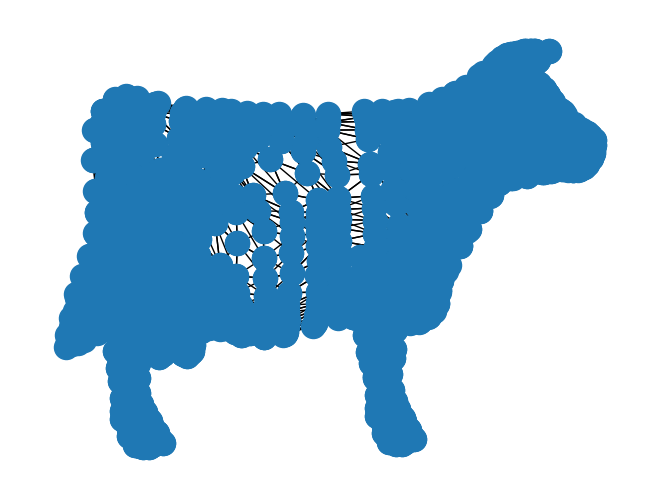

In [47]:
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])


initializeCluster(G)

cluster = nx.get_node_attributes(G,'cluster')

clusterl = list(cluster.values())

nx.draw(G,pos=posxy)

La fonction `show_with_clusters3D(G)` permet de visualiser les clusters sur des structures 3D. N'hésitez pas à l'utiliser...

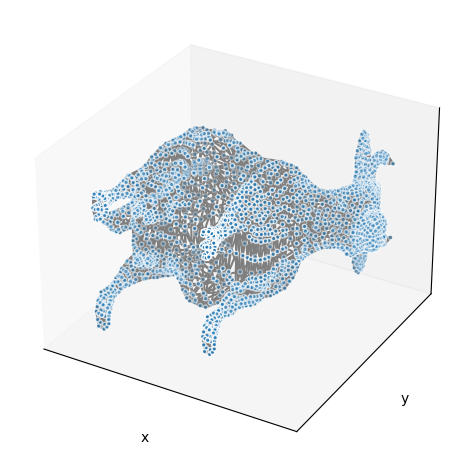

In [48]:
initializeCluster(G)

#updating clusters
def show_with_clusters3D(G): 
    cluster = nx.get_node_attributes(G,'cluster')
    clusterl = list(cluster.values())


    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    nb_colors = len(colors)
    clusters = nx.get_node_attributes(G, 'cluster')
    node_colors = [colors[clusters[u] % nb_colors] for u in G]


    # Create the 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Plot the nodes - alpha is scaled by "depth" automatically
    ax.scatter(*node_xyz.T, s=10,c=node_colors, ec="w")

    # Plot the edges
    for vizedge in edge_xyz:
        ax.plot(*vizedge.T, color="tab:gray")


    def _format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        # Suppress tick labels
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        # Set axes labels
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")


    _format_axes(ax)
    fig.tight_layout()
    plt.show()

show_with_clusters3D(G)

### Et la tête, et la tête, alouette, alouette

> __Question 7 (découpe de vaches)__ : En utilisant la valeur propre de Fiedler (et donc la fonction `spectralCluster` de la question 4), segmenter (c'est-à-dire appliquer le clustering) sur le graphe de la vache et afficher le résultat


## Et le bec, et le bec, alouette, alouette
> __Question 8 (carte blanche)__ : Visualisez la segmentation associée au vecteur propre suivant, combinez les segmentations, essayez d'autres meshs, essayez la segmentation hybride avec kmeans, amusez-vous ! 
